### **1. Linear Classification (선형 분류기)**

**Linear classification: 선형으로 데이터를 분류하는 문제**

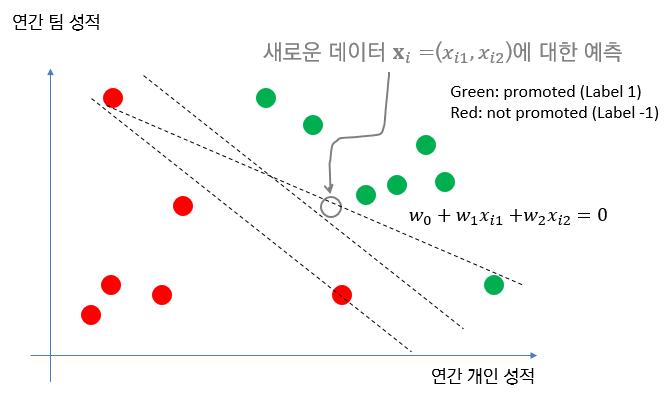

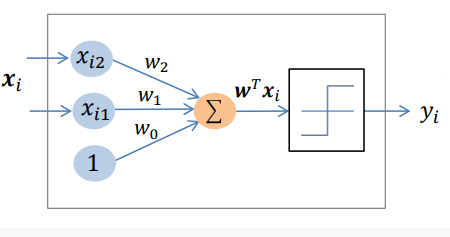

우선 bias term은 나중에 생각해보자. 일반적으로 n차원에서 주어진 데이터를 분류하는 다음과 같은 n차원 모델 

$$
\mathbf{w}=\left[\begin{array}{c}
w_{1} \\
w_{2} \\
\vdots  \\
w_{n} 
\end{array}\right]
$$

를 학습하는 것이 목표이다. 모델을 학습한 후, 다음과 같은 새로운 임의의 데이터 $\mathbf{x}_i$가 주어졌다고 가정해보자. 
$$
\mathbf{x}_i=\left[\begin{array}{c}
x_{i1} \\
x_{i2} \\
\vdots  \\
x_{in} 
\end{array}\right]
$$


이때 모델을 통과한 출력값이 0보다 크면 label 1로, 0보다 작으면 label -1로 분류한다:

$\mathbf{w}^T\mathbf{x}_i=w_1x_{i1}+...+w_nx_{in}>0$?



**실습 목표: Linear classification 모델 학습**

1. **sign 함수 구현**
2. 주어진 데이터에 대한 예측(prediction) 및 손실값(loss)을 계산하는 **forward 함수 구현**
3. 손실값을 최소로하는 모델을 찾기위한 **backward 함수 구현**
4. 성능 측정을 위한 **accuracy 함수 구현**
5. **Gaussian 데이터셋** 및 **실제 데이터셋 MNIST에 적용**


In [1]:
from __future__ import division, print_function

import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

In [2]:
plt.rcParams['figure.figsize'] = (10, 6)

**1. sign 함수 구현**


__sign(x)__: $f_w(x) =\left\{\begin{array}{ll}
1 & w^Tx\geq0 \\
-1 & w^Tx<0
\end{array}\right.$

모델 $w$와 data point $x$가 있을때, 선형 분류기에서는 classification 예측값인 $w^Tx$를 sign 함수를 통해 -1또는 1의 값으로 변환해준다.  


따라서 sign 함수는 입력값에 상관없이 출력 결과가 항상 -1 또는 1 값이 된다.

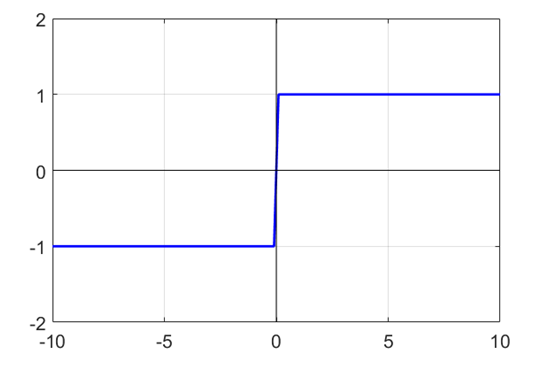

In [ ]:
## sign 함수 정의

def sign(z):
    
    result = 2 * (z >= 0) - 1    ## z>=0 이 참이면 이면 1을, 거짓 (z<0) 이면 0을 출력 
    
    return result

In [ ]:
## sign 함수 결과값 출력

print ("sign(100) = " + str(sign(100)))
print ("sign(4.5) = " + str(sign(4.5)))
print ("sign(-6) = " + str(sign(-4.5)))

sign(100) = 1
sign(4.5) = 1
sign(-6) = -1


**2. Forward 함수 구현**

데이터의 예측값인 predict와 손실값인 loss를 리턴하는 forward 함수 구현:

n개의 data point $(x_1, y_1)$, $(x_2, y_2)$, ... $(x_n, y_n)$이 있을때,

각 data point $i$에 대한 예측값: $ h(w^Tx_i)=sign \left(w^{T} x_{i}\right) \in\{+1,-1\}$ 

전체 손실값: $J(w)=\dfrac{1}{n}\sum_{i} \underbrace{\left(w^{T} x_{i}\right)\left(h(w^Tx_i) - y_{i}\right)}_{\geq 0 \text { for every } i} $

In [ ]:
def forward(x, y, w):
    n = x.shape[0]  # data point 개수

    ## predict와 loss 계산
    predict =  # sign 함수를 통과한 각 데이터의 예측값

    loss =  # 각 데이터의 예측값을 이용한 손실값
    
    return predict, loss

**3. Backward 함수 구현**

손실값 $J(w)$를 최소로하는 모델 $w$를 찾기 위해 $J(w)$를 $w$에 대해 미분:

$$
\begin{aligned}
\frac{\partial J(\boldsymbol{w})}{\partial \boldsymbol{w}} 
&=\frac{1}{n} \sum_{i=1}^{n}\left[h\left(\boldsymbol{w}^{T} \boldsymbol{x}_{i}\right)-y_{i}\right] \boldsymbol{x}_{i}\\
&= \frac{1}{n} (\hat{Y}-Y)X
\end{aligned}
$$

In [ ]:
def backward(x, y, predict):
    
    n = x.shape[0]  # data point 개수

    # 미분결과값 계산
    grad_w = 
    
    return grad_w

**4. Accuracy 함수 구현**

예측값(predict)과 label이 주어졌을 때, 성능 비교를 위한 정확도(accuracy)를 산출하는 함수 구현

In [ ]:
def accuracy(predict, y):
    
    hard_pred = 2 * (predict >= 0) - 1   # predict 값이 0 이상이면 hard_pred=1, predict 값이 0 미만이면 hard_pred=-1
    acc = (hard_pred == y).mean() * 100
    
    return acc

### **Gaussian 데이터셋에 적용**

1) 서로 다른 평균값을 가지는 두 Gaussian 분포를 이용하여 데이터셋 생성 

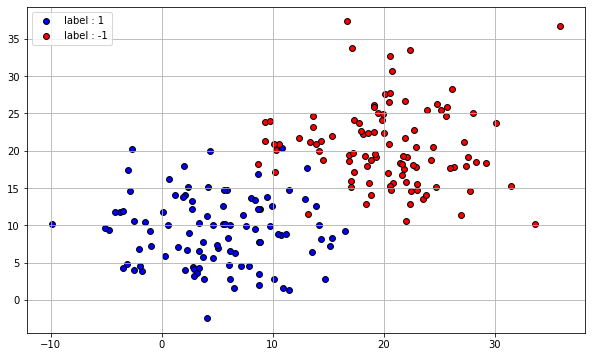

In [ ]:
#### Train data 생성
np.random.seed(100)
n = 100 # data point 개수
X1 = np.random.normal(loc=(5, 10), scale=5, size=(n, 2)) # loc: 평균, scale: 분산
X2 = np.random.normal(loc=(20, 20), scale=5, size=(n, 2)) # X1의 데이터와 X2의 데이터들이 서로 다른 평균 좌표를 갖도록 설정
Y1 = np.ones(n) 
Y2 = np.ones(n) * -1 # X1의 데이터들에는 label 1을, X2의 데이터들에는 label -1를 부여

X_train = np.concatenate((X1, X2)) # X1과 X2를 concatenate 하여 X_train 생성
Y_train = np.concatenate((Y1, Y2)) # Y1과 Y2를 concatenate 하여 Y_train 생성


#### Test data 생성
X1_test = np.random.normal(loc=(5, 10), scale=5, size=(n, 2)) # loc: 평균, scale: 분산
X2_test = np.random.normal(loc=(20, 20), scale=5, size=(n, 2)) # X1_test의 데이터와 X2_test의 데이터들이 서로 다른 평균 좌표를 갖도록 설정
Y1_test = np.ones(n)
Y2_test = np.ones(n) * -1 # X1의 데이터들에는 label 1을, X2의 데이터들에는 label -1를 부여     

X_test = np.concatenate((X1_test, X2_test)) # X1_test과 X2_test를 concatenate 하여 X_test 생성
Y_test = np.concatenate((Y1_test, Y2_test)) # Y1_test과 Y2_test를 concatenate 하여 Y_test 생성

# Train data plot
plt.scatter(X1[:, 0].T, X1[:, 1].T, color='b', edgecolor='k', label='label : 1', s=35) # s: 점크기
plt.scatter(X2[:, 0].T, X2[:, 1].T, color='r', edgecolor='k', label='label : -1', s=35)
plt.grid(True)
plt.legend()

plt.show()

2) Bias unit (바이어스)

$w^Tx + b$: 바이어스 $b$를 통해 sign 함수를 좌우로 움직일 수 있다

바이어스 term $b$를 모델파라미터에 포함시키기 위해 다음과 같이 $\bar{x}$와 $\bar{w}$를 정의


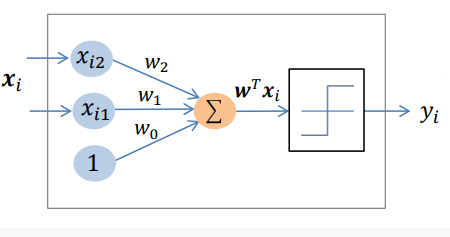
$$
\bar{x}:=\left[\begin{array}{cc}
x_{1}^{T} & 1 \\
x_{2}^{T} & 1 \\
\vdots & \\
x_{n}^{T} & 1
\end{array}\right] \in \mathbf{R}^{n \times(d+1)}, \bar{w}:=\left[\begin{array}{c}
w \\
b
\end{array}\right] \in \mathbf{R}^{d+1}
$$

In [ ]:
def bias_unit(x, w, b):
    
    unit_ones = np.ones((len(x), 1))
    x_bar = np.concatenate((x, unit_ones), axis=1)
    assert(w.ndim == 1)
    w_bar = np.concatenate([w, b])
    
    return x_bar, w_bar

3) Model initialization (모델 초기화)

학습을 시작하기 전에, 모델 파라미터들을 임의의 값으로 초기화한다

In [ ]:
def initialize_params(X_train, verbose=False):
    
    d = X_train.shape[-1]       # 데이터의 차원
    w = np.random.normal(size=d)  # Gaussian 분포로 초기화
    b = np.array([0.])
    X_train_bar, w_bar = bias_unit(X_train, w, b) # bias unit 추가
    if verbose:
        print('Bias 유닛 추가 전')
        print('shape of X_train:, ', X_train.shape)
        print('w: ', w.__repr__())
        print('b: ', b.__repr__(), end='\n\n')
        print('Bias 유닛 추가 후')
        print('shape of X_train_bar:, ', X_train_bar.shape)
        print('w_bar: ', w_bar.__repr__())
    
    return X_train_bar, w_bar

In [ ]:
np.random.seed(100)

# add bias unit
X_train_bar, w_bar = initialize_params(X_train, True)

Bias 유닛 추가 전
shape of X_train:,  (200, 2)
w:  array([-1.74976547,  0.3426804 ])
b:  array([0.])

Bias 유닛 추가 후
shape of X_train_bar:,  (200, 3)
w_bar:  array([-1.74976547,  0.3426804 ,  0.        ])


4) 초기 모델 파라미터를 이용하여 Decision Boundary 그리기

Decision boundary는 현재 모델에 의해서 결정된다. 다음과 같이 초기 모델을 이용한 decision boundary를 test data와 함께 그릴 수 있다. 아직 학습을 시작하기 전이라 decision boundary는 두 label를 구분하지 못한다.

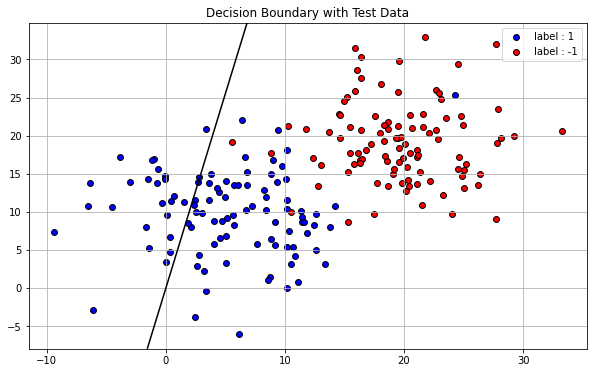

In [ ]:
plt.scatter(X1_test[:, 0].T, X1_test[:, 1].T, color='b', edgecolor='k', label='label : 1', s=35)
plt.scatter(X2_test[:, 0].T, X2_test[:, 1].T, color='r', edgecolor='k', label='label : -1', s=35)
plt.grid(True)
plt.legend()

axes = plt.gca() 
x_min, x_max = axes.get_xlim() 
y_min, y_max = axes.get_ylim()

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 30), np.linspace(y_min, y_max, 30)) # 30 grids for each axis
grids = np.c_[xx.ravel(), yy.ravel()]
Z = grids@w_bar[:X_test.shape[-1]] + w_bar[-1]
plt.contour(xx, yy, Z.reshape(xx.shape), levels=[0], colors='k')

plt.title('Decision Boundary with Test Data')
plt.show()

5) Training data를 이용한 모델 파라미터 학습




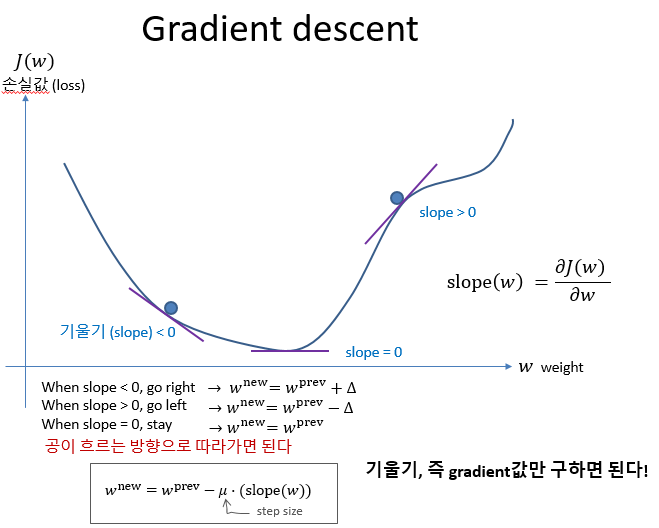

학습 순서는 다음과 같다

A. initialize_parms 함수를 이용한 모델 초기화

B. Forward 함수 및 training data를 이용한 예측값 (prediction), 손실값(loss) 계산

C. Backward 함수를 이용한 gradient 계산

D. Gradient descent를 이용한 모델 update

--> B, C, D를 for 반복문을 이용하여 num_of_iteration 만큼 반복

E. Train accuracy 및 test accuracy 계산

In [ ]:
# hyperparameter
num_of_iteration = 200000
learning_rate = 0.001

# fix random seed for reproducibility
np.random.seed(100)

# Model initialization (모델 초기화) and add bias unit
X_train_bar, w_bar = initialize_params(X_train, False)

it = tqdm(range(num_of_iteration))
for i in it:

    # Forward 함수를 이용한 prediction, loss 계산
    predict, loss = 

    # Train accuracy 계산
    train_acc = 
      
    # Backward 함수를 이용한 gradient 계산
    grad_w_bar =  

    # Gradient descent를 이용한 모델 update
    w_bar =  
    
    if i % 1000 == 0:
        it.set_postfix(accuracy='{:.2f}'.format(train_acc),
                      loss='{:.4f}'.format(loss))
    
# Train accuracy 및 test accuracy 계산
predict, _ = forward(X_train_bar, Y_train, w_bar)
train_acc = accuracy(predict, Y_train)
print('train accuracy: {:.2f}'.format(train_acc))

unit_ones = np.ones((len(X_test), 1))
X_test_bar = np.concatenate((X_test, unit_ones), axis=1) # add bias unit for test dataset

predict, _ = forward(X_test_bar, Y_test, w_bar)
test_acc = accuracy(predict, Y_test)
print('test accuracy: {:.2f}'.format(test_acc))

100%|██████████| 200000/200000 [00:11<00:00, 17776.71it/s, accuracy=97.50, loss=0.0004]

train accuracy: 97.50
test accuracy: 96.00


6) 학습한 모델 파라미터를 이용하여 Decision Boundary 그리기

학습이 완료된 모델의 decision boundary를 이용하면 test data를 잘 구분하는것을 확인할 수 있다.

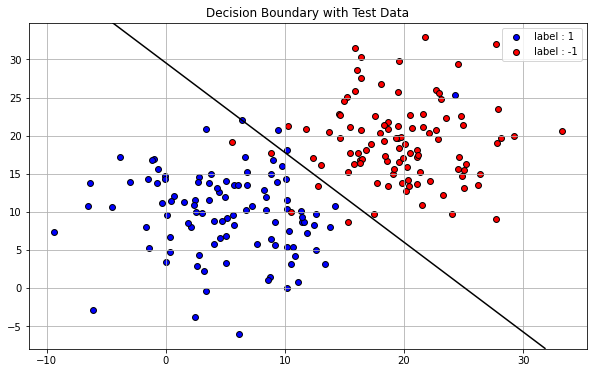

In [ ]:
plt.scatter(X1_test[:, 0].T, X1_test[:, 1].T, color='b', edgecolor='k', label='label : 1', s=35)
plt.scatter(X2_test[:, 0].T, X2_test[:, 1].T, color='r', edgecolor='k', label='label : -1', s=35)
plt.grid(True)
plt.legend()

axes = plt.gca() 
x_min, x_max = axes.get_xlim() 
y_min, y_max = axes.get_ylim()

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 30), np.linspace(y_min, y_max, 30)) # 30 grids for each axis
grids = np.c_[xx.ravel(), yy.ravel()]
Z = grids@w_bar[:X_test.shape[-1]] + w_bar[-1]
plt.contour(xx, yy, Z.reshape(xx.shape), levels=[0], colors='k')

plt.title('Decision Boundary with Test Data')
plt.show()

### 실제 데이터에 적용

 - MNIST는 0부터 9까지 사람의 손으로 쓴 손글씨 데이터이며 각각은 0-9로 레이블링 되어있음
 - 총 0 - 9 클래스 데이터중 {4, 9} 클래스의 손글씨 데이터만 가져와 숫자 이미지 분류문제에 적용해본다.

In [ ]:
# {4, 9} 클래스 mnist dataset 다운로드 및 압축풀기
!pip install gdown
!gdown --id 1n70aILNV1U8I2VJlYekKuhBGbrNtCUNb
!tar -xvf mnist_49.tar
!rm -f mnist_49.tar

Downloading...
From: https://drive.google.com/uc?id=1n70aILNV1U8I2VJlYekKuhBGbrNtCUNb
To: /content/mnist_49.tar
10.9MB [00:00, 95.0MB/s]
mnist_49/
mnist_49/X_train.npy
mnist_49/X_test.npy
mnist_49/Y_test.npy
mnist_49/Y_train.npy


Shape of data: (28, 28)
Number of train data: 11791
Number of test data: 1991


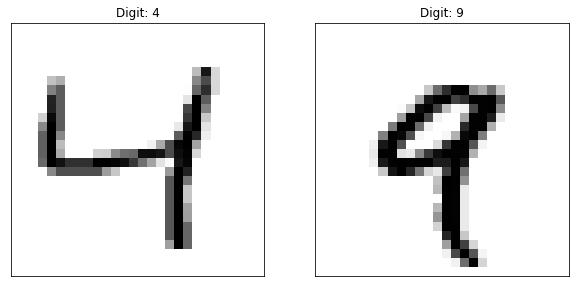

In [ ]:
# 데이터셋 로드
X_train = np.load('mnist_49/X_train.npy')
X_test = np.load('mnist_49/X_test.npy')
Y_train = 2 * np.load('mnist_49/Y_train.npy') - 1
Y_test = 2 * np.load('mnist_49/Y_test.npy') - 1

# 데이터셋 기본 정보
print('Shape of data: {}'.format(X_train.shape[1:]))
print('Number of train data: {}'.format(len(Y_train)))
print('Number of test data: {}'.format(len(Y_test)))

# 데이터 이미지 플로팅
plt.subplot(1, 2, 1)
plt.imshow(X_train[Y_train==-1][0], cmap='gray_r')
plt.title('Digit: 4')
plt.xticks([]); plt.yticks([])
plt.subplot(1, 2, 2)
plt.imshow(X_train[Y_train==1][0], cmap='gray_r')
plt.title('Digit: 9')
plt.xticks([]); plt.yticks([])
plt.show()

**현재 학습하려고 하는 모델은 벡터형 데이터를 인풋으로 받기때문에 이미지 데이터 역시 학습을 위해서 벡터형으로 펼쳐줘야한다.**

shape: (n, height, width) ---> (n, height x width)

In [ ]:
# Reshape the training and test examples

X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)

print('X_train_flatten shape: ' + str(X_train_flatten.shape))
print('Y_train shape: ' + str(Y_train.shape))
print('X_test_flatten shape: ' + str(X_test_flatten.shape))
print('Y_test shape: ' + str(Y_test.shape))

X_train_flatten shape: (11791, 784)
Y_train shape: (11791,)
X_test_flatten shape: (1991, 784)
Y_test shape: (1991,)


**0~1 사이의 값이 되도록 표준화**

In [ ]:
X_train_std = X_train_flatten / 255.
X_test_std = X_test_flatten / 255.

**Gaussian data 예제와 같은 방법으로 모델을 학습하고, train 및 test accuracy 계산**

A. initialize_parms 함수를 이용한 모델 초기화

B. Forward 함수 및 training data를 이용한 예측값 (prediction), 손실값(loss) 계산

C. Backward 함수를 이용한 gradient 계산

D. Gradient descent를 이용한 모델 update

--> B, C, D를 for 반복문을 이용하여 num_of_iteration 만큼 반복

E. Train accuracy 및 test accuracy 계산

In [ ]:
# hyperparameter
num_of_iteration = 5000
learning_rate = 0.1

# fix random seed for reproducibility
np.random.seed(100)

# Model initialization (모델 초기화) and add bias unit
X_train_bar, w_bar = initialize_params(X_train_std, False)

it = tqdm(range(num_of_iteration))
for i in it:
    
    predict, loss = forward(X_train_bar, Y_train, w_bar)  # Forward 함수를 이용한 prediction, loss 계산
    train_acc = accuracy(predict, Y_train)                # Train accuracy 계산
    grad_w_bar = backward(X_train_bar, Y_train, predict)    # Backward 함수를 이용한 gradient 계산
    w_bar = w_bar - learning_rate * grad_w_bar         # Gradient descent를 이용한 모델 update
    
    if i % 100 == 0:
        it.set_postfix(accuracy='{:.2f}'.format(train_acc),
                      loss='{:.4f}'.format(loss))
    
# compute the train & test accuracy
predict, _ = forward(X_train_bar, Y_train, w_bar)
train_acc = accuracy(predict, Y_train)
print('train accuracy: {:.2f}'.format(train_acc))

unit_ones = np.ones((len(X_test_std), 1))
X_test_bar = np.concatenate((X_test_std, unit_ones), axis=1)  # add bias unit for test dataset

predict, _ = forward(X_test_bar, Y_test, w_bar)
test_acc = accuracy(predict, Y_test)
print('test accuracy: {:.2f}'.format(test_acc))

100%|██████████| 5000/5000 [01:46<00:00, 47.17it/s, accuracy=95.95, loss=0.0833]


train accuracy: 95.95
test accuracy: 95.08


**학습된 모델을 바탕으로 예측결과 확인하기**

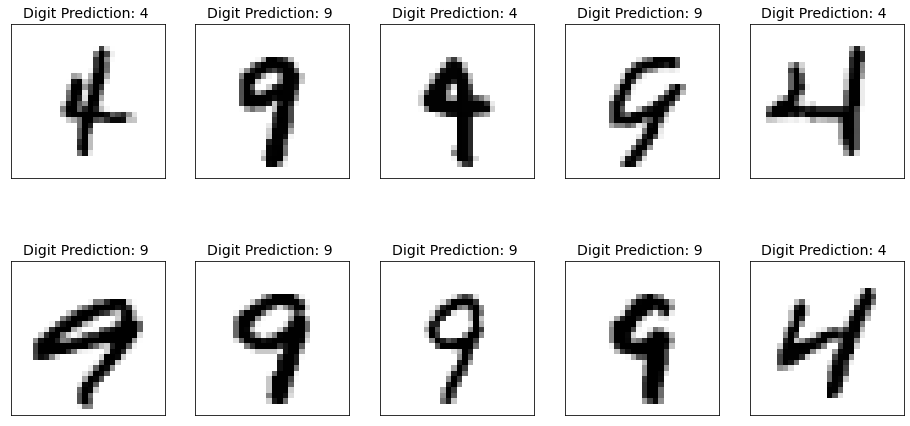

In [ ]:
# 예측결과 보기
np.random.seed(2020)
idxs = np.random.choice(len(Y_test), 10, replace=False)
label_to_class = {0: '4', 1: '9'}

plt.figure(figsize=(16, 8))
for i, idx in enumerate(idxs):
    plt.subplot(2, 5, i + 1)
    predict, _ = forward(X_test_bar, Y_test, w_bar)
    pred_label = (predict[idx] >= 0).astype(np.int)
    plt.imshow(X_test[idx], cmap='gray_r')
    plt.title('Digit Prediction: {} '.format(label_to_class[pred_label]), fontsize=14)
    plt.xticks([]); plt.yticks([])

### **2. Logistic Regression (로지스틱 회귀)**


실습 목표

1. **Logistic 함수 (Sigmoid 함수) 구현**
2. 주어진 데이터에 대한 예측(prediction) 및 손실값(loss)을 계산하는 **forward 함수 구현**
3. 손실값을 최소로하는 모델을 찾기위한 **backward 함수 구현**
4. 성능 측정을 위한 **accuracy 함수 구현**
5. **실제 데이터셋 MNIST에 적용**

**위의 선형 분류기와 다른점**

1. sign 함수 대신 조금 더 일반적인 형태인 **sigmoid 함수**를 사용
1. 1번에서 사용한 함수에 따라 {-1, 1}의 label을 선형 분류기와 달리 **{0, 1}의 label을 사용**
1. 그에 따라 유도되는 ```forward()```와 ```backward()``` 식이 달라짐.
1. 정확도를 산출하는 함수인 ```accuracy()``` 또한 **{0, 1}의 label을 사용**함에 따라 새로 정의해야 함.
1. 그 외에는 모두 동일함

**1. Logistic 함수 구현 (Sigmoid 함수)**


__Sigmoid__: $f_w(x) = \dfrac{1}{1+e^{-w^T x}}$

모델 $w$와 data point $x$가 있을때, 로지스틱 회귀에서는 classification 예측값인 $w^Tx$를 sigmoid 함수를 통해 0과 1사이의 값으로 변환해준다. 

Sigmoid 함수는 입력값에 상관없이 출력 결과가 항상 0에서 1사이 값이 된다.

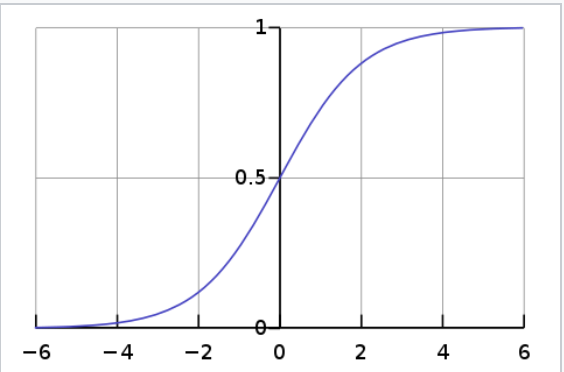

In [ ]:
## Logistic 함수 (Sigmoid 함수) 정의

def sigmoid(z):
    
    sig = 1 / (1 + np.exp(-z))
    
    return sig

In [ ]:
## Sigmoid 함수 결과값 출력

print ("sigmoid(0) = " + str(sigmoid(0)))
print ("sigmoid(4.5) = " + str(sigmoid(4.5)))
print ("sigmoid(-6) = " + str(sigmoid(-4.5)))

sigmoid(0) = 0.5
sigmoid(4.5) = 0.9890130573694068
sigmoid(-6) = 0.01098694263059318


**2. Forward 함수 구현**

데이터의 예측값인 predict와 손실값인 loss를 리턴하는 forward 함수 구현:

n개의 data point $(x_1, y_1)$, $(x_2, y_2)$, ... $(x_n, y_n)$이 있을때,

각 data point $i$에 대한 예측값: $h(w^Tx_i)=\dfrac{1}{1+e^{-w^T x_i}}$ 

전체 손실값: $J(w)=\frac{1}{n}\sum_{i=1}^n[-y_i\text{log}\{h(w^Tx_i)\} - (1-y_i)\text{log}\{1-h(w^Tx_i)\}$





In [ ]:
def forward(x, y, w, eps=1e-8):
    
    n = x.shape[0]  # data point 개수
    predict = sigmoid(x@w)  # sigmoid 함수를 통과한 각 데이터의 예측값 (prediction)
    loss = - (1 / n) * np.sum(y * np.log(predict + eps) + (1 - y) * np.log(1 - predict + eps)) # 각 데이터의 예측값을 이용한 손실값 (loss)
    
    return predict, loss

**3. Backward 함수 구현**

손실값 $J(w)$를 최소로하는 모델 $w$를 찾기 위해 $J(w)$를 $w$에 대해 미분:

$$
\begin{aligned}
\frac{\partial J(\boldsymbol{w})}{\partial \boldsymbol{w}} &=-\frac{1}{n} \sum_{i=1}^{n}\left[y_{i}\left(1-h\left(\boldsymbol{w}^{T} \boldsymbol{x}_{i}\right)\right)-\left(1-y_{i}\right) h\left(\boldsymbol{w}^{T} \boldsymbol{x}_{i}\right)\right] \boldsymbol{x}_{i} \\
&=\frac{1}{n} \sum_{i=1}^{n}\left[h\left(\boldsymbol{w}^{T} \boldsymbol{x}_{i}\right)-y_{i}\right] \boldsymbol{x}_{i}\\
&= \frac{1}{n} (\hat{Y}-Y)X
\end{aligned}
$$

In [ ]:
def backward(x, y, predict):
    
    n = x.shape[0]  # data point 개수
    grad_w = (1 / n) * (predict - y) @ x  # 미분결과
    
    return grad_w

1) Bias unit (위와 동일)

$w^Tx + b$: 바이어스 $b$를 통해 sigmoid 함수를 좌우로 움직일 수 있다

바이어스 term $b$를 모델파라미터에 포함시키기 위해 다음과 같이 $\bar{x}$와 $\bar{w}$를 정의
$$
\bar{x}:=\left[\begin{array}{cc}
x_{1}^{T} & 1 \\
x_{2}^{T} & 1 \\
\vdots & \\
x_{n}^{T} & 1
\end{array}\right] \in \mathbf{R}^{n \times(d+1)}, \bar{w}:=\left[\begin{array}{c}
w \\
b
\end{array}\right] \in \mathbf{R}^{d+1}
$$


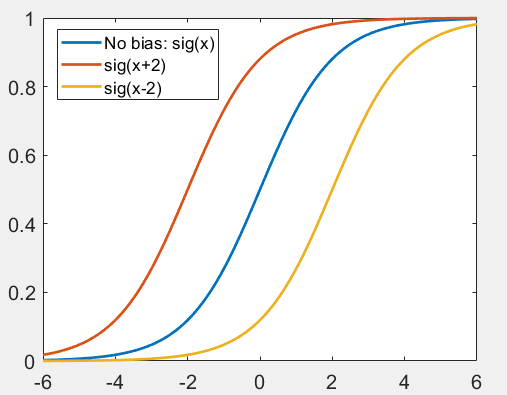

2) Model initialization (모델 초기화, 위와 동일)

학습을 시작하기 전에, 모델 파라미터들을 임의의 값으로 초기화한다

**4. Accuracy 함수 구현**

예측값(predict)과 label이 주어졌을 때, 성능 비교를 위한 정확도(accuracy)를 산출하는 함수 구현

In [ ]:
def accuracy(predict, y):
    
    hard_pred = predict >= 0.5   # predict 값이 0.5 이상이면 hard_pred=1, predict 값이 0.5 미만이면 hard_pred=0
    acc = (hard_pred == y).mean() * 100
    
    return acc

**MNIST 데이더셋 적용**

Shape of data: (28, 28)
Number of train data: 11791
Number of test data: 1991


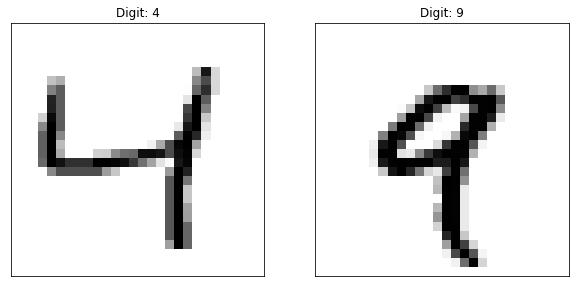

In [ ]:
# 데이터셋 로드
X_train = np.load('mnist_49/X_train.npy')
X_test = np.load('mnist_49/X_test.npy')
Y_train = np.load('mnist_49/Y_train.npy')
Y_test = np.load('mnist_49/Y_test.npy')

# 데이터셋 기본 정보
print('Shape of data: {}'.format(X_train.shape[1:]))
print('Number of train data: {}'.format(len(Y_train)))
print('Number of test data: {}'.format(len(Y_test)))

# 데이터 이미지 플로팅
plt.subplot(1, 2, 1)
plt.imshow(X_train[Y_train==0][0], cmap='gray_r')
plt.title('Digit: 4')
plt.xticks([]); plt.yticks([])
plt.subplot(1, 2, 2)
plt.imshow(X_train[Y_train==1][0], cmap='gray_r')
plt.title('Digit: 9')
plt.xticks([]); plt.yticks([])
plt.show()

**현재 학습하려고 하는 모델은 벡터형 데이터를 인풋으로 받기때문에 이미지 데이터 역시 학습을 위해서 벡터형으로 펼쳐줘야한다.**

shape: (n, height, width) ---> (n, height x width)

In [ ]:
# Reshape the training and test examples

X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)

print('X_train_flatten shape: ' + str(X_train_flatten.shape))
print('Y_train shape: ' + str(Y_train.shape))
print('X_test_flatten shape: ' + str(X_test_flatten.shape))
print('Y_test shape: ' + str(Y_test.shape))

X_train_flatten shape: (11791, 784)
Y_train shape: (11791,)
X_test_flatten shape: (1991, 784)
Y_test shape: (1991,)


**0~1 사이의 값이 되도록 표준화**

In [ ]:
X_train_std = X_train_flatten / 255.
X_test_std = X_test_flatten / 255.

**Gaussian data 예제와 같은 방법으로 모델을 학습하고, train 및 test accuracy 계산**

A. initialize_parms 함수를 이용한 모델 초기화

B. Forward 함수 및 training data를 이용한 예측값 (prediction), 손실값(loss) 계산

C. Backward 함수를 이용한 gradient 계산

D. Gradient descent를 이용한 모델 update

--> B, C, D를 for 반복문을 이용하여 num_of_iteration 만큼 반복

E. Train accuracy 및 test accuracy 계산

In [ ]:
# hyperparameter
num_of_iteration = 5000
learning_rate = 0.1

# fix random seed for reproducibility
np.random.seed(100)

# Model initialization (모델 초기화) and add bias unit
X_train_bar, w_bar = initialize_params(X_train_std, False)

it = tqdm(range(num_of_iteration))
for i in it:
    
    predict, loss = forward(X_train_bar, Y_train, w_bar)  # Forward 함수를 이용한 prediction, loss 계산
    train_acc = accuracy(predict, Y_train)                # Train accuracy 계산
    grad_w_bar = backward(X_train_bar, Y_train, predict)    # Backward 함수를 이용한 gradient 계산
    w_bar = w_bar - learning_rate * grad_w_bar         # Gradient descent를 이용한 모델 update
    
    if i % 100 == 0:
        it.set_postfix(accuracy='{:.2f}'.format(train_acc),
                      loss='{:.4f}'.format(loss))
    
# compute the train & test accuracy
predict, _ = forward(X_train_bar, Y_train, w_bar)
train_acc = accuracy(predict, Y_train)
print('train accuracy: {:.2f}'.format(train_acc))

unit_ones = np.ones((len(X_test_std), 1))
X_test_bar = np.concatenate((X_test_std, unit_ones), axis=1)  # add bias unit for test dataset

predict, _ = forward(X_test_bar, Y_test, w_bar)
test_acc = accuracy(predict, Y_test)
print('test accuracy: {:.2f}'.format(test_acc))

100%|██████████| 5000/5000 [01:15<00:00, 66.12it/s, accuracy=96.14, loss=0.1132]

train accuracy: 96.17
test accuracy: 95.23


### **3. Scikit-Learn 라이브러리를 이용하여 위의 알고리즘 구현 (MNIST 데이터셋 적용)**

#### **3.1 선형 분류기 구현**

1. 선형 분류기는 ```Perceptron``` 클래스로 부터 구현가능
2. **eta0**: learning rate, **max_iter**: number of iterations
3. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# 레이블만 {-1, 1}의 값을 갖도록 다시 로드
Y_train = 2 * np.load('mnist_49/Y_train.npy') - 1
Y_test = 2 * np.load('mnist_49/Y_test.npy') - 1

model = Perceptron(eta0=0.1, max_iter=5000)  # learning rate = 0.1
model.fit(X_train_std, Y_train)

# 정확도 산출 함수 제공 (accuracy_score)
Y_Pred_train = model.predict(X_train_std)
print('Training Accuracy :{:.2f}%'.format(100*accuracy_score(Y_train, Y_Pred_train)))

Y_Pred_test = model.predict(X_test_std)
print('Test Accuracy :{:.2f}%'.format(100*accuracy_score(Y_test, Y_Pred_test)))

Training Accuracy :97.49%
Test Accuracy :96.74%


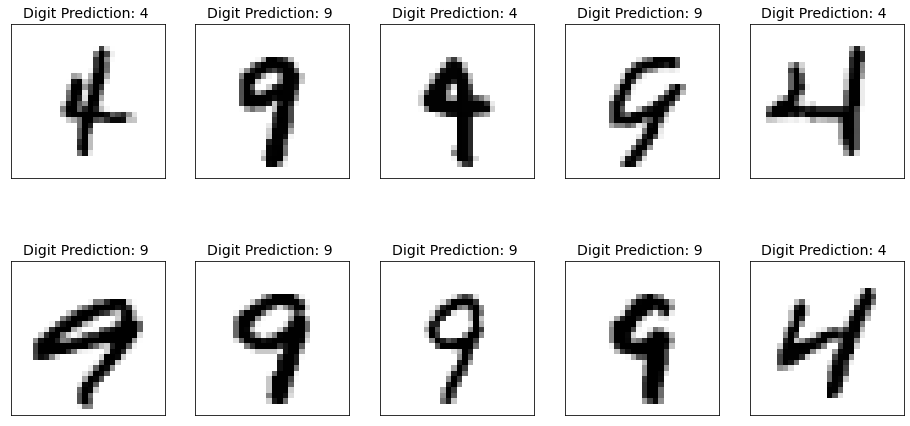

In [ ]:
# Plotting results with confident level
np.random.seed(2020)
idxs = np.random.choice(len(Y_test), 10, replace=False)
label_to_class = {0: '4', 1: '9'}

plt.figure(figsize=(16, 8))
for i, idx in enumerate(idxs):
    plt.subplot(2, 5, i + 1)
    predict = model.predict(X_test_std)
    pred_label = (predict[idx] >= 0).astype(np.int)
    plt.imshow(X_test[idx], cmap='gray_r')
    plt.title('Digit Prediction: {} '.format(label_to_class[pred_label]), fontsize=14)
    plt.xticks([]); plt.yticks([])

#### **3.2 로지스틱 회귀 구현**

1. 로지스틱 회귀는 ```SGDClassifier``` 클래스로 부터 구현가능
2. **loss**: 손실함수 결정 (logistic 함수), **eta0**: learning rate, **max_iter**: number of iterations
3. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

# 레이블만 {0, 1}의 값을 갖도록 다시 로드
Y_train = np.load('mnist_49/Y_train.npy')
Y_test = np.load('mnist_49/Y_test.npy')

model = SGDClassifier(loss='log', eta0=0.1, max_iter=5000)  # loss='log' 는 로지스틱 함수를 손실함수로 사용하겠다는 의미
model.fit(X_train_std, Y_train)

# 정확도 산출 함수 제공 (accuracy_score)
Y_Pred_train = model.predict(X_train_std)
print('Training Accuracy :{:.2f}%'.format(100*accuracy_score(Y_train, Y_Pred_train)))

Y_Pred_test = model.predict(X_test_std)
print('Test Accuracy :{:.2f}%'.format(100*accuracy_score(Y_test, Y_Pred_test)))

Training Accuracy :97.72%
Test Accuracy :96.94%
